# Проект: изучение причин оттока клиентов банка 

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.**

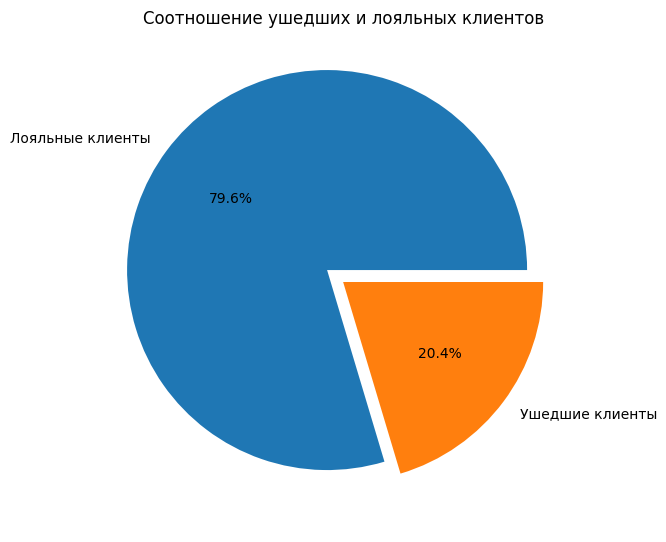

In [100]:
# создадим сначала копию исходного датасета, чтобы уверенно производить манипуляции
churn_df = churn_data.copy()
# удалим сразу ненужный столбец RowNumber
churn_df = churn_df.drop('RowNumber', axis=1)
# создаем признак, который определяет поличество лояльных и ушедших клиентов
left_and_loyal = churn_df['Exited'].value_counts()
# на его основе строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    left_and_loyal,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    explode=[0.1, 0]
)
axes.set_title('Соотношение ушедших и лояльных клиентов');

*Выводы: Исходя из данных, представленных в виде круговой диаграммы, мы можем сделать вывод, что банк потерял чуть больше пятой части своих клиентов за период, отраженный в датасете.*

**9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.**

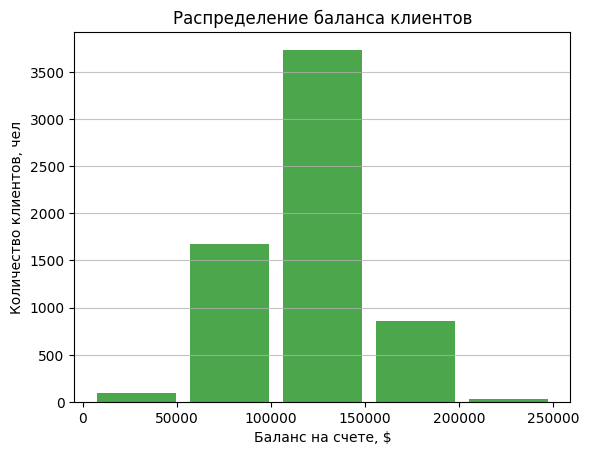

In [101]:
# сначала отфильтруем пользователей по необходимому балансу
balance_data = churn_df[churn_df['Balance'] > 2500]

# теперь построим гистограмму
plt.hist(
    x=balance_data['Balance'],
    histtype='bar',
    bins=5,
    color='green',
    alpha=0.7,
    rwidth=0.85,
)
plt.grid(axis='y', alpha=0.75)
plt.title('Распределение баланса клиентов')
plt.xlabel('Баланс на счете, $')
plt.ylabel('Количество клиентов, чел');


*Выводы:*
*Мы можем заметить, что у большей части клиентов (37%) на счете от 100000 до 150000. Количество тех, у кого больше 200000 и тех, у кого меньше 50000, минимальное.*

**9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.**

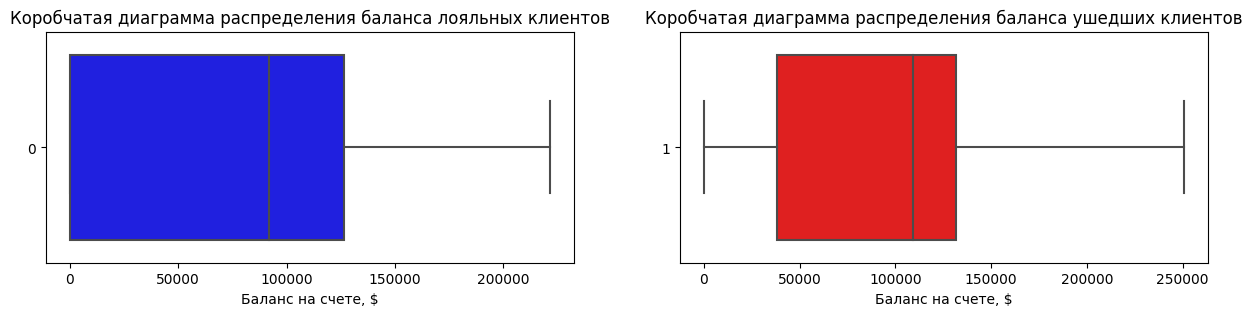

In [102]:
import seaborn as sns

# для визуализации нам подойдет коробчатая диаграмма
# построим две диаграммы: для лояльных и ушедших клиентов соответственно
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
boxplot0 = sns.boxplot(
    data = churn_df[churn_df['Exited'] == 0],
    y='Exited',
    x='Balance',
    orient='h',
    ax=axes[0],
    palette=['blue']
)
boxplot0.set_title('Коробчатая диаграмма распределения баланса лояльных клиентов')
boxplot0.set_xlabel('Баланс на счете, $')
boxplot0.set_ylabel('')

boxplot1 = sns.boxplot(
    data = churn_df[churn_df['Exited'] == 1],
    y='Exited',
    x='Balance',
    orient='h',
    ax=axes[1],
    palette=['red']
)
boxplot1.set_title('Коробчатая диаграмма распределения баланса ушедших клиентов')
boxplot1.set_xlabel('Баланс на счете, $')
boxplot1.set_ylabel('');



*Выводы:* 
1. *Исходя из диаграмм, мы сразу можем сделать вывод, что данные представлены не по дебетовым, а по кредитным картам. На это указывает тот факт, что существует базовый лимит расходов по карте ориентировочно в 140000$. На него указывает третий квартиль. Другим признаком можно назвать и то, что уходящие клиенты вероятнее всего должны снимать или переводить все деньги со своего дебетового счета перед отказом от сервиса. Однако, в диаграмме такой тенденции не наблюдается.*
2. *Ожидаемо, что лояльные клиенты пользуются картами охотнее, поэтому их диаграмма шире, чем у ушедших клиентов. Это же подтверждает медианное значение баланса: для лояльных клиентов оно ниже, чем у ушедших.*
3. *Около четверти лояльных клиентов имеют нулевой баланс по карте. Ушедшие клиенты почти не использовали полный лимит карты.*

**9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?**

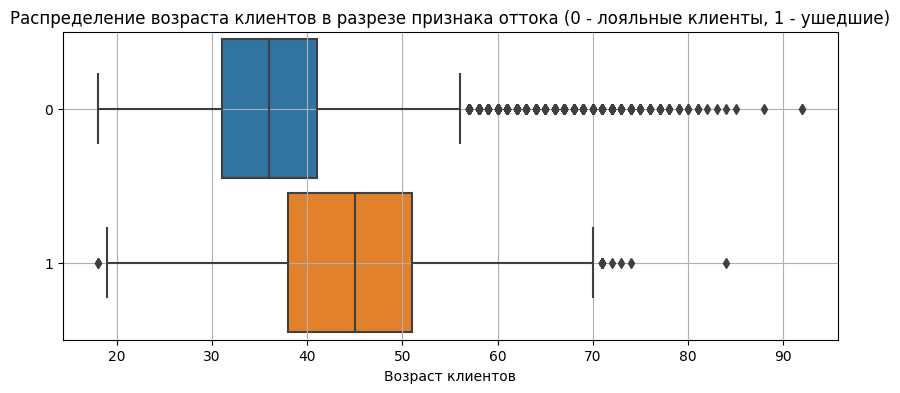

In [103]:
fig = plt.figure(figsize=(10, 4))
boxplot_age = sns.boxplot(
    data = churn_df,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
);
boxplot_age.set_title('Распределение возраста клиентов в разрезе признака оттока (0 - лояльные клиенты, 1 - ушедшие)');
boxplot_age.set_xlabel('Возраст клиентов');
boxplot_age.set_ylabel('');
boxplot_age.grid()

*Выводы:*
1. *Большая часть лояльных клиентов состоит в возрастной группе 32-42 года. При этом клиенты, отказавшиеся от банковского сервиса, старше: большей их части 38-52 года. Об этом же говорят и медианные показатели: 36 лет против 45 для лояльных и ушедших клиентов, соответственно.*
2. *Мы можем заметить большое количество выбросов в лояльной группе клиентов по возрасту 56 и старше. Учитывая, что карты оформляются по паспортным данным, данные значения нельзя считать ошибочными. Однако, это свидетельствует о крайне малом числе клиентов пенсионного возраста.*
3. *Банку нужно в первую очередь обратить внимание на нужды и потребности своих клиентов в возрасте от 38 лет. Данная группа имеет бОльшие доходы и бОльшие потребности, соответственно, они готовы брать кредиты на бОльшие суммы и приносить доход банку от процентов.* 
4. *В дальнейшем также можно обратить внимание на возрастную группу от 18 (минимальный возраст получения карты) до 32. В этой группе клиенты приносят меньший доход в краткосрочной перспективе, но могут дольше оставаться лояльными и в долгосрочной перспективе могут стать ключевыми по показателям прибыльности.*

**9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.**

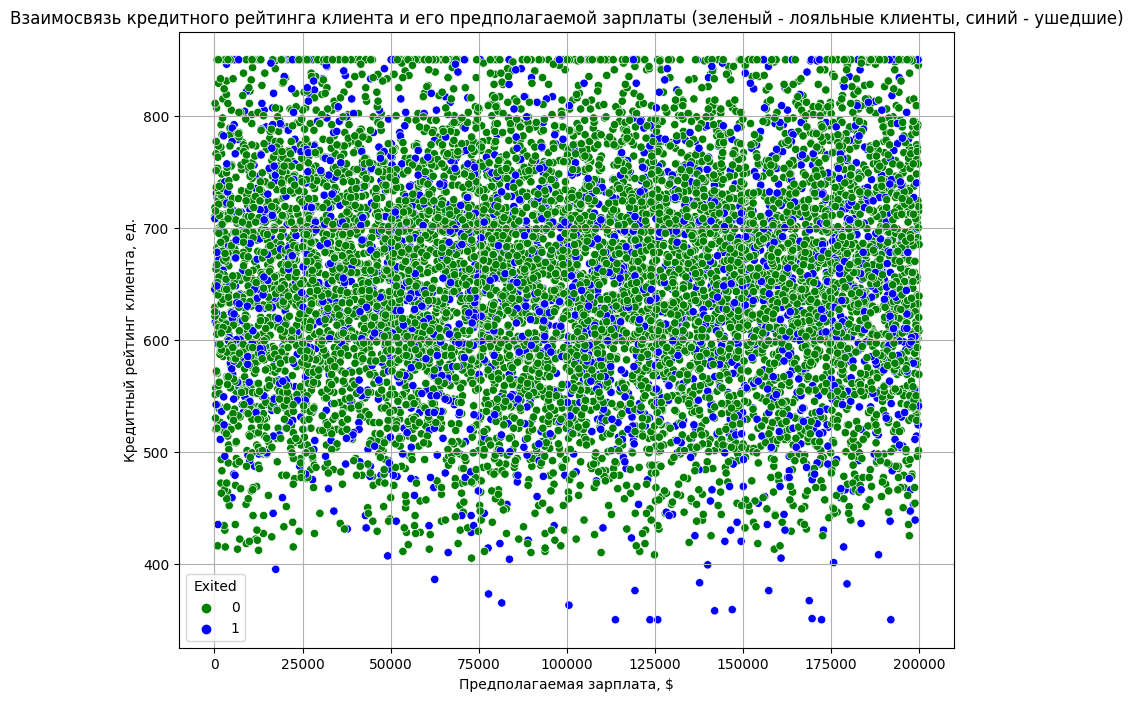

In [104]:
# Для визуализации взаимосвязи нескольких признаков с расцветкой по оттоку нам подойдет диаграмма рассеяния
fig = plt.figure(figsize=(10, 8))

scatterplot = sns.scatterplot(
    data=churn_df,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited',
    palette=['green', 'blue']
)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты (зеленый - лояльные клиенты, синий - ушедшие)');
scatterplot.set_xlabel('Предполагаемая зарплата, $');
scatterplot.set_ylabel('Кредитный рейтинг клиента, ед.');
scatterplot.grid()

*Выводы:*
- *В целом сложно увидеть явную корреляцию между кредитным рейтингом и предполагаемой зарплатой ушедших и лояльных клиентов. Однако, можно заметить, что с самым низким кредитным рейтингом (ниже 400 единиц) представлены только ушедшие клиенты.* 

**9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.**

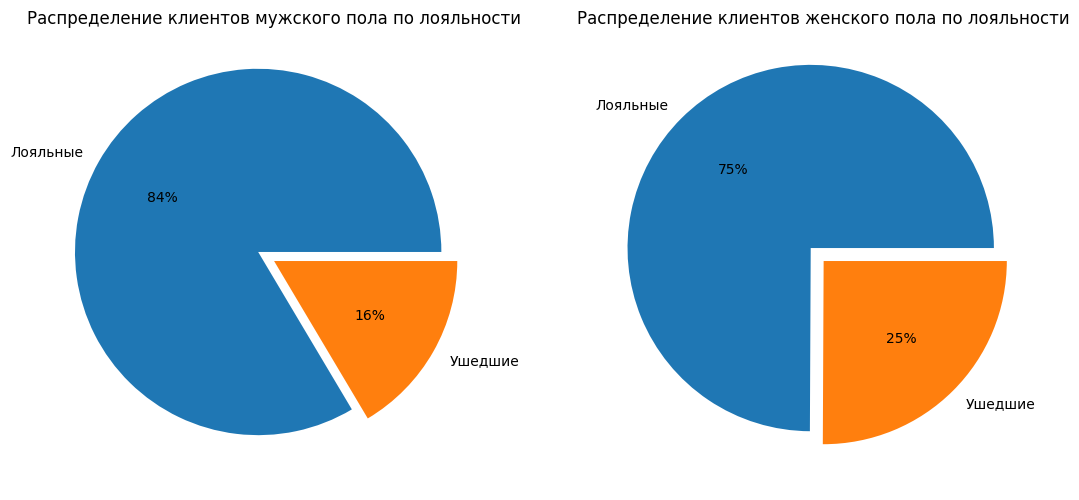

In [105]:
# Для визуализации части от целого нам подойдет круговая диаграмма
# Создадим по такой диаграмме для каждого пола

gender_f = churn_df[churn_df['Gender'] == 'Female']['Exited'].value_counts()
gender_m = churn_df[churn_df['Gender'] == 'Male']['Exited'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(13, 10))
axes[0].pie(
    x=gender_m,
    labels=['Лояльные', 'Ушедшие'],
    autopct='%.0f%%',
    explode=[0.1, 0]
)
axes[0].set_title('Распределение клиентов мужского пола по лояльности')

axes[1].pie(
    x=gender_f,
    labels=['Лояльные', 'Ушедшие'],
    autopct='%.0f%%',
    explode=[0.1, 0]
)
axes[1].set_title('Распределение клиентов женского пола по лояльности');

*Выводы:*
- *Клиенты женского пола чаще отказываются от услуг банка, нежели клиенты-мужчины*

**9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.**

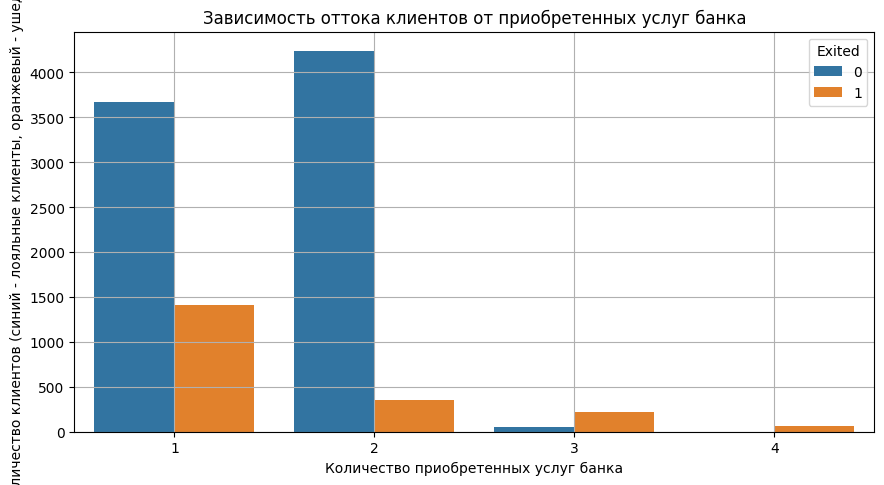

In [106]:
services = churn_df.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
sns.barplot(
    data=services,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',
    orient='v',
);
axes.set_title('Зависимость оттока клиентов от приобретенных услуг банка')
axes.set_xlabel('Количество приобретенных услуг банка')
axes.set_ylabel('Количество клиентов (синий - лояльные клиенты, оранжевый - ушедшие')
axes.grid();

*Выводы:*
1. *Лояльные клиенты приобретают не более двух услуг банка. При этом половина из них приобретают лишь одну.*
2. *Ушедшие клиенты активнее пользовались услугами банка: часть клиентов покупали три и даже четыре услуги.*

**9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?**

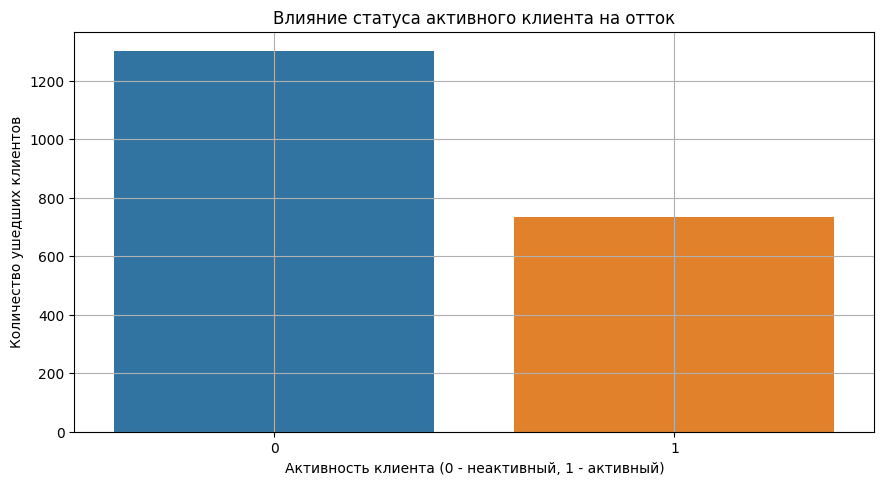

In [107]:
active = churn_df[churn_df['Exited'] == 1].groupby(by='IsActiveMember', as_index=False)['Exited'].count()

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

sns.barplot(
    data=active,
    x='IsActiveMember',
    y='Exited',
    orient='v',
);
axes.set_title('Влияние статуса активного клиента на отток')
axes.set_xlabel('Активность клиента (0 - неактивный, 1 - активный)')
axes.set_ylabel('Количество ушедших клиентов')
axes.grid();

*Выводы:*
- *Заметим, что неактивные клиенты уходят почти в два раза чаще, чем активные. Клиент, замечая, что он не использует кредитную карту, чаще задумывается о том, чтобы от нее отказаться. Исходя из этого, чтобы сохранить клиента необходимо провоцировать его чаще использовать кредитную карту. Этого можно добиться, предлагая клиенту различные акции (например, пониженный процент по кредиту в течении следующего месяца или бесплатное обслуживание карты).*  

**9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.**

In [161]:
exited_country = churn_df[churn_df['Exited'] == 1].groupby(by='Geography', as_index=False)['Exited'].count()
percent_country = churn_df.groupby(by='Geography', as_index=False)['Exited'].count()
percent_country['Percent'] = round(exited_country['Exited'] / percent_country['Exited'] * 100, 2)


fig = px.choropleth(
    data_frame=percent_country,
    locations='Geography',
    locationmode='country names',
    color='Percent',
    title=('Отток клиентов по странам'),
    width=800,
    height=500,
)
fig.show()

*Выводы:*
- *Первое, что мы можем заметить, что в датасете представлено только три страны: Испания, Франция и Германия.*
- *Отток во Франции и Испании одинаков - около 16%.*
- *На тепловой картограмме выделяется Германия. Там отток в два раза выше, чем в других странах - 32%. Причинами причины могут служить недовольство качеством сервиса на немецком языке или более привлекательные предложения конкурентов в данной стране.*

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

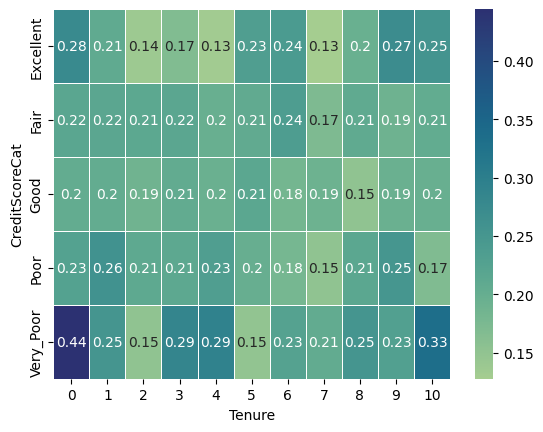

In [181]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)


churn_pivot = churn_df.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited',
    aggfunc='mean'
)

fig = sns.heatmap(
    data=churn_pivot,
    annot=True,
    linewidth=.5,
    cmap='crest'
)

*Выводы:*
- *В таблице отчетливо видно, что новые клиенты с самым низким кредитным рейтингом чаще всего отказываются от услуг банка. В целом категория клиентов с очень низким рейтингом наиболее подвержена оттоку. Это объяснимо: клиенты с таким рейтингом менее ответственны и чаще забывают возвращать банку кредит в обозначенное сроки, в связи с этим вынуждены выплачивать бОльшие проценты и пенни. Как следствие, клиент задумывается о необходимости использования данного сервиса банка и вероятнее принимает решение об уходе.*
- *Категория пользователей с наилучшим кредитным рейтингом проявляет себя наиболее лояльной через 2-4 года использования сервиса. Однако и в данной группе можно заметить "всплески": банки ценят таких клиентов и, возможно, на определенном этапе предложение другого банка может повлиять на их уход.*
